<a href="https://colab.research.google.com/github/saigo24/Dimplomado_Ciencia_Datos/blob/main/AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

#Early
from tensorflow.keras.callbacks import EarlyStopping


Versión de Tensorflow:  2.11.0


In [ ]:
pip install torch pytorch-lightning pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
from pytorch_forecasting import TimeSeriesDataSet, GroupNormalizer, TemporalFusionTransformer

# Datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AMZN.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['AMZN.csv']))

In [ ]:
print('\n Shape of the data:')
print(df.shape)
df.head()


 Shape of the data:
(3775, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-24,3.6910,3.8465,3.6375,3.7975,3.7975,187908000
1,2008-03-25,3.7915,3.8145,3.7025,3.7585,3.7585,126550000
2,2008-03-26,3.7070,3.7560,3.6620,3.6900,3.6900,125702000
3,2008-03-27,3.7185,3.7345,3.5400,3.5400,3.5400,158848000
4,2008-03-28,3.5500,3.6105,3.4630,3.4880,3.4880,105582000


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
# df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(df[['Date', 'Close']])
data2=pd.DataFrame(df)
#
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)
data.head()

data2.index = data2.Date
data2.drop('Date', axis=1, inplace=True)
data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-03-24,3.6910,3.8465,3.6375,3.7975,3.7975,187908000
2008-03-25,3.7915,3.8145,3.7025,3.7585,3.7585,126550000
2008-03-26,3.7070,3.7560,3.6620,3.6900,3.6900,125702000
2008-03-27,3.7185,3.7345,3.5400,3.5400,3.5400,158848000
2008-03-28,3.5500,3.6105,3.4630,3.4880,3.4880,105582000


# Train & Test

In [ ]:
# plot
len_data = len(data)
len_train = int(len_data*0.8) # 80%  = 3019
len_test = len_data- len_train # 20% = 2415
print (len_data, '=', len_train, '+',len_test)

3775 = 3020 + 755


In [ ]:
# plot
len_data = len(data2)
len_train = int(len_data*0.8) # 80%  = 3019
len_test = len_data- len_train # 20% = 2415
print (len_data, '=', len_train, '+',len_test)

3775 = 3020 + 755


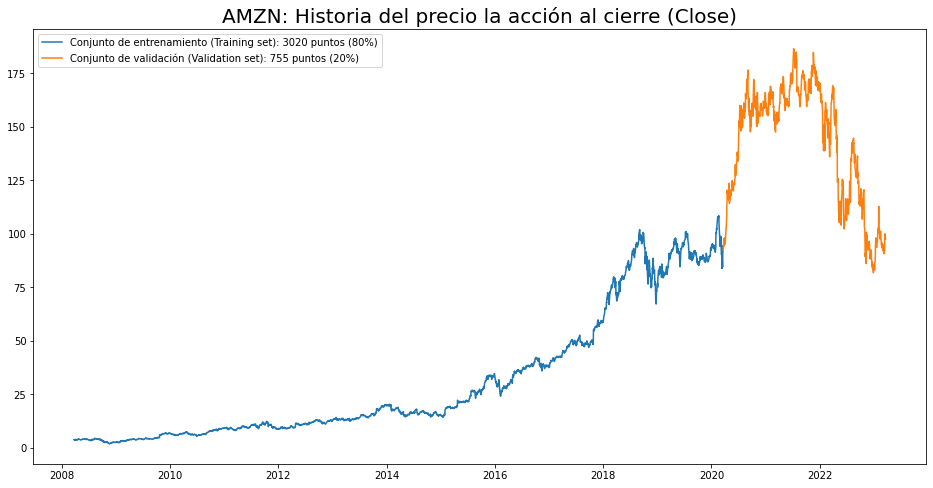

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(data['Close'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) #248 data
plt.title("AMZN: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

In [ ]:
#creating train and test sets
dataset = data.values
# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [ ]:
#creating train and test sets
dataset = data2.values
# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))

dataset2 = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)))
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])


In [ ]:
dataset.shape

(3775,)

In [ ]:
print(dataset2)

[[0.01038906 0.01015779 0.01039565 0.01107029 0.01107029 0.14826598]
 [0.01093102 0.0099864  0.01075063 0.01085927 0.01085927 0.09484105]
 [0.01047534 0.00967307 0.01052945 0.01048864 0.01048864 0.09410269]
 ...
 [0.50683662 0.5304653  0.51268807 0.53180952 0.53180952 0.05818153]
 [0.52862317 0.52869783 0.52279152 0.52591183 0.52591183 0.06055534]
 [0.52118125 0.51702159 0.51317956 0.51920258 0.51920258 0.03897544]]


In [ ]:
def multipaso_data(dataset, target, start_index, end_index, history_size,
                      target_size,  single_step=False):
    ''' dataset: conjunto de datos para las secuencias de entrada
        target:  conjunto de datos para las secuencias de salida
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
        single_step: Predecir solamente un valor futuro (=True),
                     o predecir todos los valores hasta target_size(=False)
    '''
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

Se coloca una semilla para gerantizar reproductibidad

In [ ]:
tf.random.set_seed(100)

In [ ]:
#
# hiperparámetros para crear las secuencias
#
# tamaño de pasos a futuro
future_target = 10

# tamaño secuencias de entrada
past_history = 60

TRAIN_SPLIT = int(len_data*0.8) #3020: nuḿer0 de datos entreno

# Crea los datos
X_train, y_train = multipaso_data(dataset, dataset, 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target)
X_test, y_test = multipaso_data(dataset, dataset, TRAIN_SPLIT,
                                                 None, past_history,
                                                 future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#3020
#(2960, 60)
#(2960, 10)
#(685, 60)
#(685, 10)

3020
(2960, 60)
(2960, 10)
(685, 60)
(685, 10)


In [ ]:
#
# hiperparámetros para crear las secuencias
#
# tamaño de pasos a futuro
future_target = 10

# tamaño secuencias de entrada
past_history = 60

TRAIN_SPLIT = int(len_data*0.8) #3020: nuḿer0 de datos entreno

# Crea los datos
X_train, y_train = multipaso_data(dataset2, dataset2, 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target)
X_test, y_test = multipaso_data(dataset2, dataset2, TRAIN_SPLIT,
                                                 None, past_history,
                                                 future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#3020
#(2960, 60)
#(2960, 10)
#(685, 60)
#(685, 10)

3020
(2960, 60, 6)
(2960, 10, 6)
(685, 60, 6)
(685, 10, 6)


In [ ]:
# shapes
input_shape = (X_train.shape[1], 1)
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.0, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.0, name= 'Dropout_02')(x)
outputs = Dense(future_target)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# shapes
input_shape = (X_train.shape[1], 1)
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.0, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.0, name= 'Dropout_02')(x)
outputs = Dense(future_target)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

In [ ]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/40
84/84 [==============================] - 7s 29ms/step - loss: 2.9481e-04 - val_loss: 0.0044
Epoch 2/40
84/84 [==============================] - 2s 23ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 3/40
84/84 [==============================] - 2s 24ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 4/40
84/84 [==============================] - 3s 31ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 5/40
84/84 [==============================] - 3s 32ms/step - loss: 0.0041 - val_loss: 9.7046e-04
Epoch 6/40
84/84 [==============================] - 2s 24ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 7/40
84/84 [==============================] - 2s 23ms/step - loss: 0.0028 - val_loss: 8.2374e-04
Epoch 8/40
84/84 [==============================] - 2s 24ms/step - loss: 3.2859e-04 - val_loss: 4.8135e-04
Epoch 9/40
84/84 [==============================] - 2s 24ms/step - loss: 1.7859e-04 - val_loss: 4.9557e-04
Epoch 10/40
84/84 [==============================] - 2s 26ms/step - loss: 1.1466e

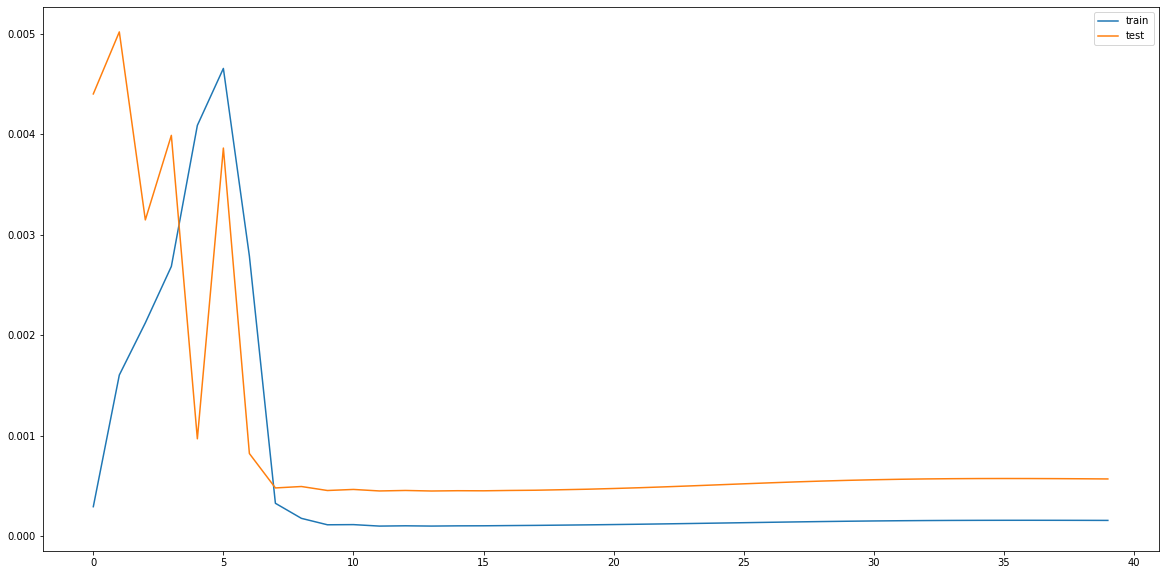

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
X_test.shape

(685, 60)

In [ ]:
# predictions
prediction = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

22/22 [==============================] - 1s 7ms/step


In [ ]:
print(X_test.shape)
print(prediction.shape)
print(y_test.shape)

(685, 60)
(685, 10)
(685, 10)


In [ ]:
pred =0
y_train_p = X_test[pred,:]
y_test_p = y_test[pred,:]
y_pred_p = prediction[pred,:]

#print(y_train_p.shape)
#print(y_test_p.shape)
#print(y_pred_p.shape)

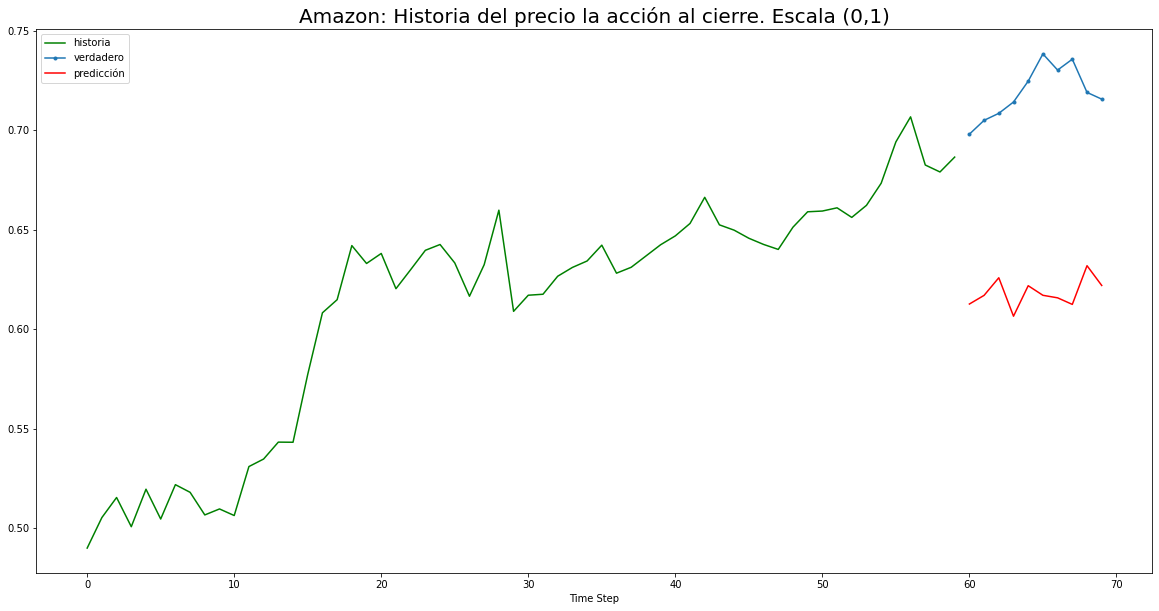

In [ ]:
plt.plot(np.arange(0, len(y_train_p)), y_train_p, 'g', label="historia")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_test_p, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_pred_p, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Amazon: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

In [ ]:
model_01.save('../Datos/modelo_Apple_3_dia_multipl3.h5')

In [ ]:
model_01.get_config()

{'name': 'series_LSTM_model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Dropout',
   'config': {'name': 'Dropout_01',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.0,
    'noise_shape': None,
    'seed': None},
   'name': 'Dropout_01',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'LSTM',
   'config': {'name': 'LSTM_layer',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 50,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'shared_object_id': 2},
    'recurren

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2008-03-24 to 2023-03-20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3775 non-null   datetime64[ns]
 1   Open       3775 non-null   float64       
 2   High       3775 non-null   float64       
 3   Low        3775 non-null   float64       
 4   Close      3775 non-null   float64       
 5   Adj Close  3775 non-null   float64       
 6   Volume     3775 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 235.9 KB


In [ ]:
df1 = df.loc[:, df.columns != 'Date']
df1.head()
df1.info()
print(3775*6)
print(df.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2008-03-24 to 2023-03-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3775 non-null   float64
 1   High       3775 non-null   float64
 2   Low        3775 non-null   float64
 3   Close      3775 non-null   float64
 4   Adj Close  3775 non-null   float64
 5   Volume     3775 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.4 KB
22650
DatetimeIndex(['2008-03-24', '2008-03-25', '2008-03-26', '2008-03-27',
               '2008-03-28', '2008-03-31', '2008-04-01', '2008-04-02',
               '2008-04-03', '2008-04-04',
               ...
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-20'],
              dtype='datetime64[ns]', name='Date', length=3775, freq=None)


In [ ]:
df_list = []

for label in df1:

    ts = df1[label]

    start_date = min(ts.fillna(method='ffill').dropna().index)
    end_date = max(ts.fillna(method='bfill').dropna().index)

    tmp = pd.DataFrame({'Num': ts})
    tmp['index']=df2.index
    date = tmp.index
    tmp['date'] = date
    tmp['Variable'] = label

    #stack all time series vertically
    df_list.append(tmp)

time_df = pd.concat(df_list).reset_index(drop=True)
#22649


In [ ]:
time_df.tail(
)

,Num,index,date,Variable
22645,60912700.0,3770,2023-03-14,Volume
22646,70731800.0,3771,2023-03-15,Volume
22647,84446900.0,3772,2023-03-16,Volume
22648,87173200.0,3773,2023-03-17,Volume
22649,62388900.0,3774,2023-03-20,Volume


In [ ]:
#Hyperparameters
#batch size=64
#number heads=4, hidden sizes=160, lr=0.001, gr_clip=0.1

max_prediction_length = 7
max_encoder_length = 21

training = TimeSeriesDataSet(
    time_df,
    time_idx="index",
    target="Num",
    group_ids=["Variable"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Variable"],
    time_varying_unknown_reals=['Num'],
    target_normalizer=GroupNormalizer(
        groups=["Variable"], transformation="softplus"
    ),  # we normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

In [ ]:

validation = TimeSeriesDataSet.from_dataset(training, time_df, predict=True, stop_randomization=True)

# create dataloaders for  our model
batch_size = 64
# if you have a strong GPU, feel free to increase the number of workers
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [ ]:
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

NameError: ignored

In [ ]:
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        print("El animal está hablando")

class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name)
        self.breed = breed

    def speak(self):
        print("El perro está ladrando")

# Crear una instancia de la clase Dog
my_dog = Dog("Max", "Labrador")
print(my_dog.name)  # Salida: Max
print(my_dog.breed)  # Salida: Labrador
my_dog.speak()

Max
Labrador
El perro está ladrando


In [ ]:

Animal("Juan").speak()

El animal está hablando
